In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist


# Loading Data

In [2]:
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [3]:
x_train.shape

(60000, 28, 28)

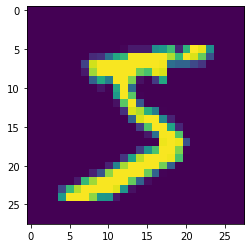

In [4]:
plt.imshow(x_train[0])

In [5]:
y_train.shape

(60000,)

# PreProcessing Data


In [6]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [7]:
# using one hot encoding to make result categorical

from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train)
y_cat_test = to_categorical(y_test)

In [8]:
y_cat_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [9]:
# scale data to prepare for nural network

x_train = x_train/255
x_test = x_test/255

# reshape ==> batchsize, width , height , color_channels

x_train = x_train.reshape(60000 , 28 , 28 , 1)
x_test = x_test.reshape(10000 , 28 , 28 , 1)

# Training the Model

In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [11]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 32)        544       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4608)              0         
                                                                 
 dense (Dense)               (None, 128)               589952    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 591,786
Trainable params: 591,786
Non-trainable params: 0
__________________________________________________

In [13]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=2 )

In [14]:
model.fit(x_train,y_cat_train,epochs=10,validation_data=(x_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 47s 24ms/step - loss: 0.1409 - accuracy: 0.9576 - val_loss: 0.0602 - val_accuracy: 0.9803
Epoch 2/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0482 - accuracy: 0.9847 - val_loss: 0.0442 - val_accuracy: 0.9849
Epoch 3/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0293 - accuracy: 0.9911 - val_loss: 0.0398 - val_accuracy: 0.9869
Epoch 4/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0206 - accuracy: 0.9932 - val_loss: 0.0380 - val_accuracy: 0.9880
Epoch 5/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0139 - accuracy: 0.9957 - val_loss: 0.0425 - val_accuracy: 0.9859
Epoch 6/10
1875/1875 [==============================] - 38s 20ms/step - loss: 0.0107 - accuracy: 0.9965 - val_loss: 0.0489 - val_accuracy: 0.9863


# Evaluate the Model

In [15]:
model.metrics_names

['loss', 'accuracy']

In [18]:
losses = pd.DataFrame(model.history.history)
losses.head()

,loss,accuracy,val_loss,val_accuracy
0,0.140883,0.957617,0.060151,0.9803
1,0.048200,0.984683,0.044187,0.9849
2,0.029298,0.991117,0.039772,0.9869
3,0.020577,0.993183,0.037959,0.9880
4,0.013920,0.995700,0.042477,0.9859


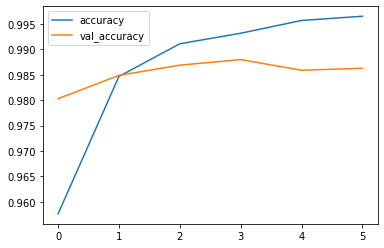

In [19]:
losses[['accuracy','val_accuracy']].plot()

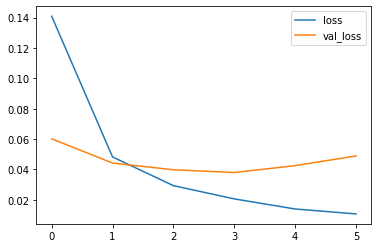

In [20]:
losses[['loss','val_loss']].plot()

In [21]:
print(model.metrics_names)
print(model.evaluate(x_test,y_cat_test,verbose=0))

['loss', 'accuracy']
[0.04886849969625473, 0.986299991607666]


In [27]:
from sklearn.metrics import classification_report,confusion_matrix
predict_x=model.predict(x_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      0.99      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



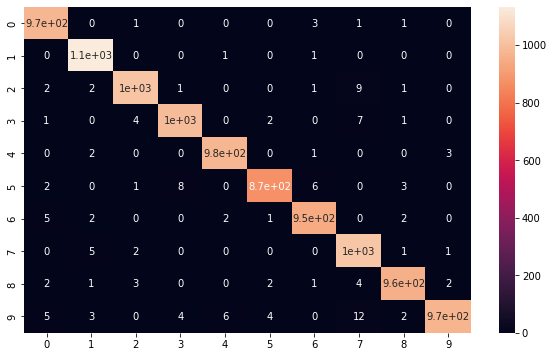

In [29]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.heatmap(confusion_matrix(y_test,classes_x),annot=True)